In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
seed = 42

file = 'data/data.csv'
df = pd.read_csv(file)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df.nunique()[df.nunique()==1]

 Net Income Flag    1
dtype: int64

In [7]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [8]:
new_df = df.drop(' Net Income Flag',axis=1)
new_df.nunique()[df.nunique()==1]

Series([], dtype: int64)

In [9]:
new_df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [10]:
correlation_array = new_df.corr().unstack().drop_duplicates().sort_values(kind='Quicksort')


top_negative_corrs = correlation_array[correlation_array<-0.5]
print(top_negative_corrs)

 Debt ratio %                         Net worth/Assets                              -1.000000
 Net worth/Assets                     Current Liability to Assets                   -0.842583
 Borrowing dependency                 Net Income to Stockholder's Equity            -0.806478
 Net Income to Stockholder's Equity   Liability to Equity                           -0.791836
 Contingent liabilities/Net worth     Working Capital/Equity                        -0.767778
 Current Liabilities/Equity           Net Income to Stockholder's Equity            -0.749621
 Working Capital/Equity               Current Liabilities/Equity                    -0.692675
                                      Liability to Equity                           -0.650474
 Debt ratio %                         Equity to Liability                           -0.625879
 Working Capital to Total Assets      Current Liability to Current Assets           -0.625560
 Equity to Long-term Liability        Net Income to Stockhol

In [11]:
top_positive_corrs = correlation_array[correlation_array>0.75][::-1]
print(top_positive_corrs)

Bankrupt?                                                 Bankrupt?                                             1.000000
 Operating Gross Margin                                    Gross Profit to Sales                                1.000000
 Net Value Per Share (A)                                   Net Value Per Share (C)                              0.999837
 Operating Gross Margin                                    Realized Sales Gross Margin                          0.999518
 Realized Sales Gross Margin                               Gross Profit to Sales                                0.999518
 Net Value Per Share (B)                                   Net Value Per Share (A)                              0.999342
                                                           Net Value Per Share (C)                              0.999179
 Operating Profit Per Share (Yuan ¥)                       Operating profit/Paid-in capital                     0.998696
 After-tax Net Profit Growth Rat

In [12]:
new_df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
X, y = new_df.loc[:,new_df.columns != 'Bankrupt?'], new_df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=seed)

# ---------------------------------------------------------------------------------------------------------------

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.model_selection import RandomizedSearchCV

In [15]:
from helpers import metrics

In [ ]:
# Initiate classification models for imbalanced data. 
rf_model = BalancedRandomForestClassifier( 
    n_jobs=-1,
    random_state=seed)

easy_model = EasyEnsembleClassifier(
    n_jobs=-1,
    random_state=seed)

bagging_model = BalancedBaggingClassifier(
    n_jobs=-1,
    random_state=seed)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)

scores = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
rf_parameters = {'n_estimators':[50,100,200,300,400,500,600,700,900, 1000]}
easy_parameters = {'n_estimators':[50,100,200,300,400,500,600,700,900, 1000]}
bagging_parameters = {'n_estimators':[50,100,200,300,400,500,600,700,900, 1000]}

rf_hyper_tuner = RandomizedSearchCV(rf_model, rf_parameters,scoring= 'roc_auc', random_state=seed).fit(X_train,y_train)
easy_hyper_tuner = RandomizedSearchCV(easy_model, easy_parameters,scoring= 'roc_auc', random_state=seed).fit(X_train,y_train)
bagging_hyper_tuner = RandomizedSearchCV(bagging_model, bagging_parameters,scoring= 'roc_auc', random_state=seed).fit(X_train,y_train)

In [ ]:
print('The AUC score for each model is:\nBalanced Random Forest: {:.3f}\nEasy Ensemble: {:.3f}\nBalanced Bagging: {:.3f}'.format(
      rf_hyper_tuner.best_score_,
    easy_hyper_tuner.best_score_,
    bagging_hyper_tuner.best_score_)
     )

In [ ]:
print('The best parameters for each model are:\nBalanced Random Forest: {}\nEasy Ensemble: {}\nBalanced Bagging: {}'.format(
      rf_hyper_tuner.best_params_,
    easy_hyper_tuner.best_params_,
    bagging_hyper_tuner.best_params_)
     )

# Results ---------------------------------------------------------------------------

In [16]:
clf = BalancedRandomForestClassifier( 
    n_estimators = 500,
    n_jobs=-1,
    random_state=seed)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)


In [17]:
results = metrics(y_test,y_pred,y_prob)

In [18]:
results.report()

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1647
           1       0.17      0.84      0.28        58

    accuracy                           0.85      1705
   macro avg       0.58      0.85      0.60      1705
weighted avg       0.97      0.85      0.90      1705



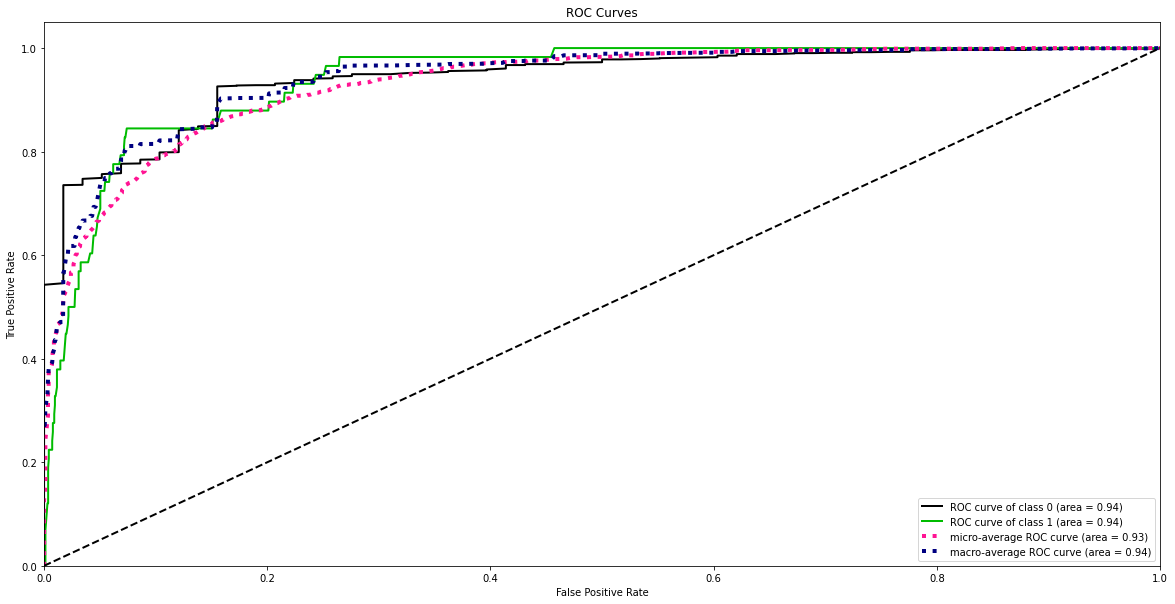

In [19]:
results.roc()

In [20]:
results.test()

test2
